<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/ESAA_OB_week6_ch8_1~3_pg_466~486.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#[파이썬 머신러닝 완벽가이드 ch8.1~3 텍스트 분석]

# **08 텍스트 분석**
---

## **01. 텍스트 분석 이해**
---

>텍스트 분석은 비정형 데이터인 텍스트를 분석하는 것.<br/>
머신러닝 알고리즘은 <u>숫자형의 피처 기반 데이터만 입력받을 수 있기 때문에,</u><br/>
텍스트를 머신러닝에 적용하기 위해 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고 추출된 피처에 의미있는 값을 부여하는가 하는 것이 매우 중요한 요소

>텍스트를 word 기반의 다수의 피처로 추출하고 이 피처에 단어 빈도수와 같은 숫자값을 부여하면<br/> 텍스트는 단어의 조합인 벡터값으로 표현될 수 있는데, 이렇게 텍스트를 변환하는 것을 **피처 벡터화(Feature Vectorization)** 또는 **피처 추출(Feature Extraction)**이라고 함

> 대표적으로 텍스트를 피처 벡터화해서 변환하는 방법에는 BOW(Bag of Words)와 Word2Vec 방법 존재.

**텍스트 분석 수행 프로세스**

>머신러닝 기반의 텍스트 분석 프로세스는 다음과 같은 프로세스 순으로 수행
1. **텍스트 사전 준비작업(텍스트 전처리)**: 텍스트를 피처로 만들기 전 미리 클렌징. 대/소문자 변경, 특수문자 삭제, 단어(Word) 등의 토큰화, 의미없는 단어(Stop word) 제거, 어근 추출(Stemming/Lemmatization) 등의 텍스트 정규화 작업 수행
2. **피처 벡터화/추출**: 텍스트에서 피처 추출 후 벡터 값 할당. BOW와 Word2Vec이 대표적.
3. **ML 모델 수립 및 학습/예측/평가**: 피처 벡터화된 데이터 세트에 ML 모델을 적용해 학습/예측 및 평가 수행.

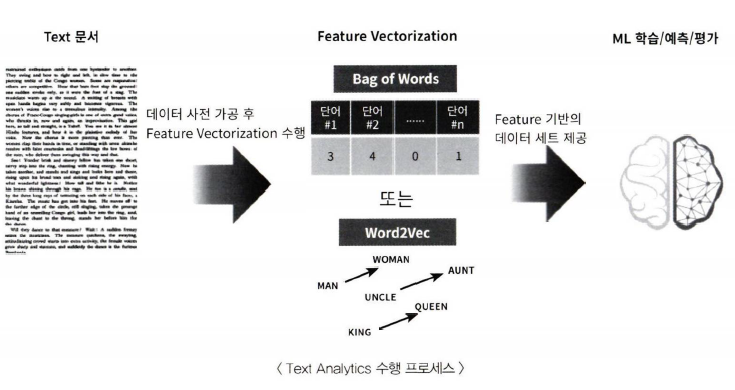

**파이썬 기반의 NLP(Natural Language Processing)(자연어 처리), 텍스트 분석 패키지**

* NLTK(Natural Language Toolkit for Python): 파이썬의 가장 대표적인 NLP 패키지. 수행 속도, 정확도 등 부족.
* Gensim: 토픽 모델링 분야에서 가장 두각. SpaCy와 함께 가장 많이 사용되는 NLP 패키지
* SpaCy: 뛰어난 수행 성능으로 최근 가장 주목받는 NLP 패키지

## **02. 텍스트 사전 준비 작업(텍스트 전처리) - 텍스트 정규화**
---

>텍스트 자체를 바로 피처로 만들 수는 없으며 사전에 텍스트를 가공하는 준비 작업 필요함.<br/>
텍스트 정규화는 텍스트를 머신러닝 알고리즘이나 NLP 애플리케이션에 입력 데이터로 사용하기 위해 클렌징, 토큰화, 어근화 등의 다양한 텍스트 데이터의 사전 작업을 수행하는 것을 의미함.
* 클렌징(Cleansing)
* 토큰화(Tokenization)
* 필터링/스톱 워드 제거/철자 수정
* Stemming
* Lemmatization

###**클렌징**

>텍스트에서 분석에 오히려 방해가 되는 불필요한 문자, 기호 등을 사전에 제거하는 작업.<br/>
 ex)HTML,XML 태그, 특정 기호 등 제거

###**텍스트 토큰화**

>문장 토큰화: 문서에서 문장 분리<br/>
단어 토큰화: 문장에서 단어를 토큰으로 분리

**문장 토큰화**

>문장 토큰화(entence tokenization)는 문장의 마침표, 개행문자(\n) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적임.<br/>
정규 표현식에 따른 문장 토큰화도 가능함.<br/>
NTLK에서 일반적으로 많이 쓰이는 sent_tokenize 이용해 토큰화 수행해보기.<br/>
3개의 문장으로 이루어진 텍스트 문서를 문장으로 분리하는 예제.

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from nltk import sent_tokenize
import nltk
nltk.download('punkt')  #마침표, 개행 문자 등의 데이터 세트 다운로드.

text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
               You can see it out your window or on your television. \
               You feel it when you go to work, or go to church or pay your taxes.'
sentences = sent_tokenize(text = text_sample)   #각가긔 문장으로 구성된 list 객체 반환.
print(type(sentences),len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**단어 토큰화**

>단어 토큰화(Word Tokenization)는 문장을 단어로 토큰화함.<br/>
기본적으로 공백, 콤마, 마침표, 개행문자 등으로 단어를 분리하지만, 정규 표현식을 이용해 다양한 유형으로 토큰화 수행 가능

>마침표나 개행문자와 같이 문장을 분리하는 구분자를 이용해 단어를 토큰화할 수 있으므로 BOW(Bag of Word)와 같이 단어의 순서가 중요하지 않은 경우 문장 토큰화를 사용하지 않고 단어 토큰화만 사용해도 충분함.<br/>
문장 토큰화는 일반적으로 각 문장이 가지는 시맨틱적인 의미가 중요한 요소로 사용될 때 사용함.

In [10]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words),len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


>이번에는 sent_tokenize와 word_tokenize를 조합해 문서에 대해 모든 단어 토큰화하기.<br/>
이전 예제에서 선언된 3개의 문장으로 된 text_sample을 문장별로 단어 토큰화 적용.

In [11]:
from nltk import word_tokenize, sent_tokenize

#여러 개의 문장으로 된 입력 데이터를 문장별로 단어 토큰화하게 만드는 함수 생성.
def tokenize_text(text):

  #문장별로 분리 토큰
  sentences = sent_tokenize(text)
  #분리된 문장별 단어 토큰화
  word_tokens = [word_tokenize(sentence) for sentence in sentences]
  return word_tokens

#여러 문장에 대해 문장별 단어 토큰화 수행.
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


>3개 문장을 문장별로 먼저 토큰화했으므로 word_tokens 변수는 3개의 리스트 객체를 내포하는 리스트.<br/>
내포된 개별 리스트 객체는 각각 문장별로 토큰화된 단어를 요소로 가지고 있음.

>문장을 단어별로 하나씩 토큰화할 경우 문맥적 의미는 무시될 수밖에 없음<br/>
n_gram: 연속되 n개의 단어를 하나의 토큰화 단위로 분리해 내는 것.<br/>
예) "Agent Smith Knocks the door"를 2-gram(bigram)으로 만들면<br/>
(Agent,Smith),(Smith,knocks),(knocks,the),(the,door)

###**스톱 워드 제거**

>스톱 워드(Stop word): 분석에 큰 의미 없는 단어.<br/>
is, the, a, will과 같이 문맥적으로 의미없는 문법적 단어.<br/>텍스트에 빈번하게 등장해 중요한 단어로 인지될 수 있으므로 제거 작업 중요.

In [12]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [14]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
#위 예제에서 3개의 문장별로 얻은 word_tokens list에 대해 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
  filtered_words=[]
  #개별 문장별로 토큰화된 문장 list에 대해 스톱 워드를 제거하는 반복문
  for word in sentence:
    #소문자로 변환
    word = word.lower()
    #토큰화된 개별 단어가 스톱 워드의 단어에 포함되지 않으면 word_tokens에 추가
    if word not in stopwords:
      filtered_words.append(word)
  all_tokens.append(filtered_words)

print(all_tokens)

[['matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['see', 'window', 'television', '.'], ['feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]


>'is','this'와 같은 스톱 워드 필터링 통해 제거됨.

###**Stemming & Lemmatization**

>과거/현재, 3인칭 단수 여부, 진행형 등 매우 많은 조건에 따라 원래 단어가 변화함.<br/>
Stemming과 Lemmatization은 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것.

>Lemmatization이 Stemming보다 정교하며 의미론적인 기반에서 단어의 원형을 찾음 --> 변환에 더 오랜 시간 소요
* **Stemming**: 원형 단어로 변환 시 일반적인 방법을 적용하거나 더 단순화된 방법을 적용해 원래 단어에서 일부 철자가 훼손된 어근 단어를 추출하는 경향.
* **Lemmatization**: 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근 단어를 찾아줌

* NLTK에서 제공하는 Stemmer: Porter,Lancaster,Snowball Stemmer
* Lemmatization을 위해서는 WordNetLemmatizer

In [15]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'),stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'),stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


>work의 경우 단순한 변화이므로 원형 단어인 work 제대로 인식함<br/>
amuse,happy,fancy의 경우 원형을 제대로 찾지 못함.

In [19]:
#Lemmatization은 보다 정확한 원형 단어 추출을 위해 단어의 '품사'를 입력해주어야함.
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing','v'),lemma.lemmatize('amuses','v'),lemma.lemmatize('amused','v'))
print(lemma.lemmatize('happier','a'),lemma.lemmatize('happiest','a'))
print(lemma.lemmatize('fancier','a'),lemma.lemmatize('fanciest','a'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


amuse amuse amuse
happy happy
fancy fancy


>Stemmer보다 정확하게 원형 단어 추출함.

## **03. Bag of Words - BOW**
---

>Bag of Words 모델은 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 모델.<br/>
문장1: 'My wife likes to watch baseball games and my daughter likes to watch baseball games too'<br/>
문장2: 'My wife likes to play baseball'
1. 문장1과 문장2에 있는 모든 단어에서 중복을 제거하고 각 단어(feature 또는 term)를 칼럼 형태로 나열 후 각 단어에 고유한 인덱스를 다음과 같이 부여함.<br/>
'and':0,'baseball':1,'daughter':2,'games':3,'likes':4,'my':5,'play':6,'to':7,'too':8,'watch':9,'wife':10
2. 개별 문장에서 해당 단어가 나타나는 횟수(Occurrence)를 각 단어(단어 인덱스)에 기재함.<br/>
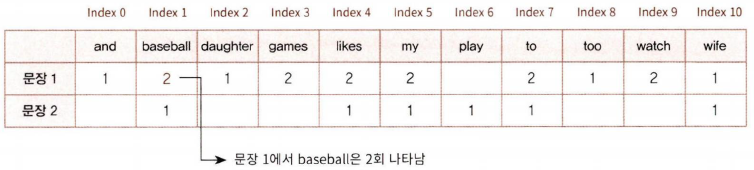

>장점: 쉽고 빠른 구축. 문서의 특징 잘 나타냄.<br/>
단점:
* 문맥 의미(Semantic Context) 반영 부족: 단어의 순서를 고려하지 않으므로 문맥적 의미 무시됨.
* 최소 행렬 문제(희소성, 최소 행렬): 많은 문서에서 단어를 추출하면 단어의 수는 매우 많고 대부분의 데이터는 0값으로 채워짐.<br/>
이처럼 대규모의 칼럼으로 구성된 행렬에서 대부분의 값이 0으로 채워져 있는 희소 행렬(Sparse Matrix) 생성됨.<br/>
반대로 대부분의 값이 0이 아닌 의미있는 값으로 채워져 있는 밀집 행렬(Dense Matrix).

### **BOW 피쳐 벡터화**

> 피쳐 벡터화: 텍스트를 특정 의미를 가지는 숫자형 값인 벡터 값으로 변환.<br/>
BOW 모델에서의 피처 벡터화: 모든 문서에서 모든 단어를 칼럼 형태로 나열 후 각 무서에서 해당 단어의 횟수나 정규화된 빈ㄴ도를 값으로 부여하는 데이터 세트 모델로 변경하는 것.<br/>
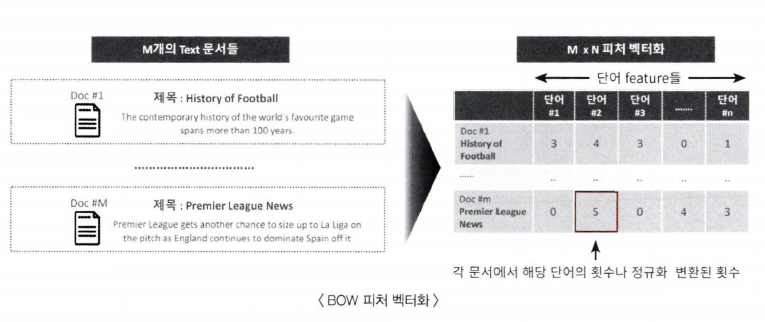

>BOW의 피쳐 벡터화는 두 가지 방식 존재함.
* 카운트 기반의 벡터화
* TF-IDF(Term Frequency - Inverse Document Frequency) 기반의 벡터화.

>1. 카운트 기반의 벡터화: 단어 피처에 값 부여 시 각 문서에서 해당 단어가 나타나는 횟수(count)를 부여하는 경우.
* 카운트 값이 높을수록 중요 단어로 인식됨.
2. TF-IDF(Term Frequency Inverse Document Frequency): 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되, 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식으로 값 부여.<br/>
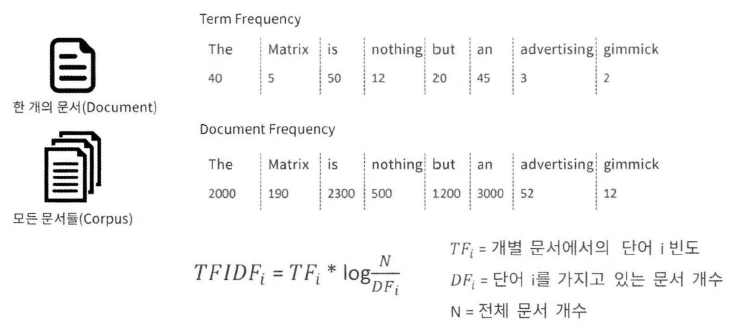

### **사이킷런의 Count 및 TF-IDF 벡터화 구현: CountVectorizer, TfidfVectorizer**

>사이킷런의 CountVectorizer 클래스는 카운트 기반의 벡터화를 구현한 클래스.<br/>
피처 벡터화 뿐 아니라 소문자 일괄 변환, 토큰화, 스톱 워드 필터링 등의 텍스트 전처리도 함께 수행.

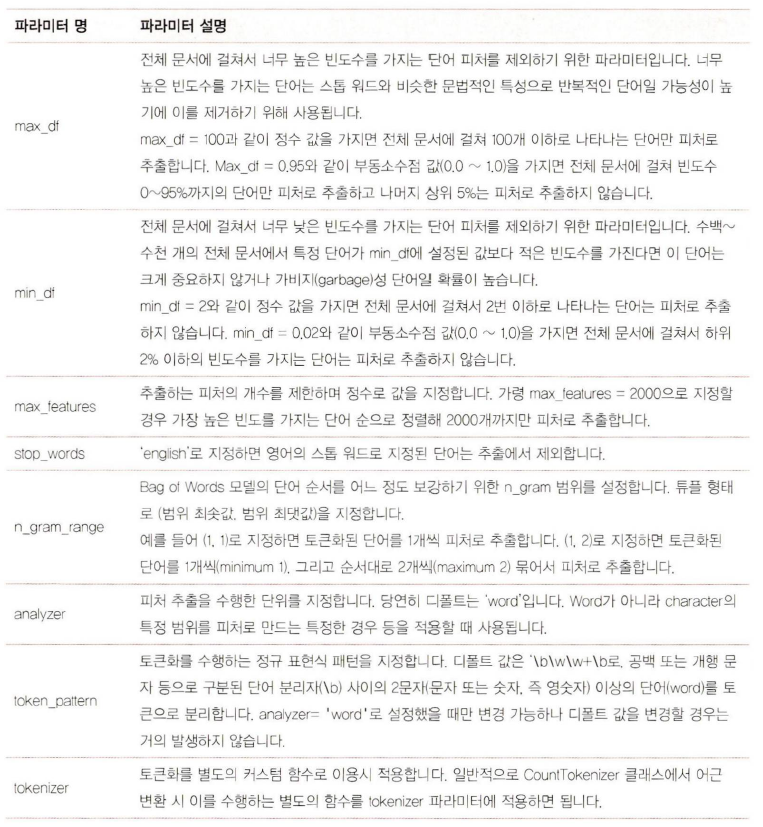

>사이킷런의 CountVectorizer 클래스를 이용해 카운트 기반의 피처 여러 개의 문서로 구성된 텍스트의 피처 벡터화 방법<br/>
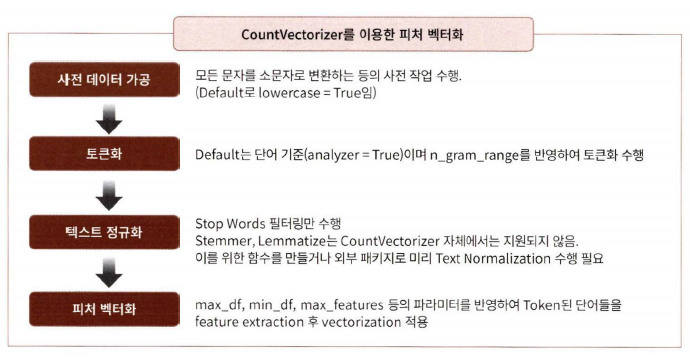

### **BOW 벡터화를 위한 희소 행렬**

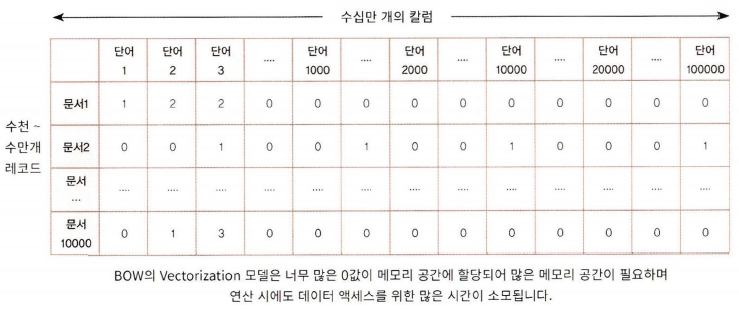

>희소 행렬을 물리적으로 적은 메모리 공간을 차지할 수 있도록 변환하는 대표적 방법: COO 형식 & CSR 형식.

### **희소행렬 - COO 형식**

>COO(Coordinate:좌표) 형식은 0이 아닌 데이터만 별도의 데이터 배열(Array)에 저장하고, 그 데이터가 가리키는 행과 열의 위치를 별도의 배열로 저장하는 방식.<br/>
사이파이(Scipy)의 sparse 패키지 주로 이용.

In [21]:
import numpy as np

dense = np.array([[3,0,1],[0,2,0]])

In [22]:
from scipy import sparse

# 0이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 배열로 생성
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

#sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))

In [23]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

### **희소 행렬 - CSR 형식**

CSR(Compressed Sparse Row) 형식으 COO 형식이 행과 열의 위치를 나타내기 위해서 반복적인 위치 데이터를 사용해야 하는 문제점을 해결한 방식.<br/>
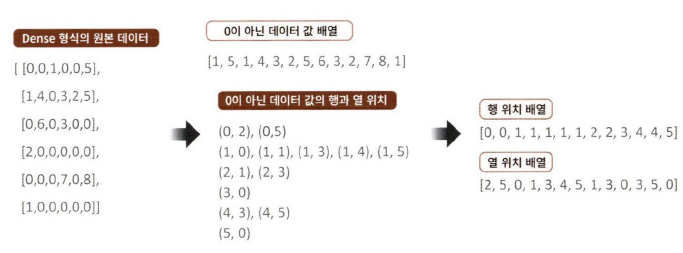

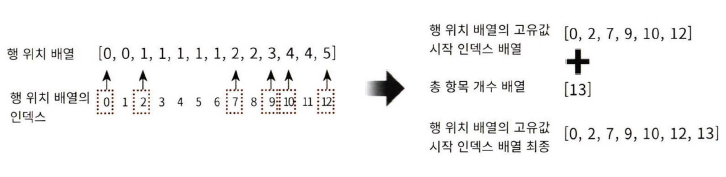

In [25]:
from scipy import sparse

dense2 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

# 0이 아닌 데이터 추출
data2 = np.array([1,5,1,4,3,2,5,6,3,2,7,8,1])

# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0,0,1,1,1,1,1,2,2,3,4,4,5])
col_pos = np.array([2,5,0,1,3,4,5,1,3,0,3,5,0])

# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

#행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0,2,7,9,10,12,13])

# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_coo.toarray())
print('CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인')
print(sparse_csr.toarray())

COO 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
CSR 변환된 데이터가 제대로 되었는지 다시 Dense로 출력 확인
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


In [26]:
#실제 사용 시에는 다음과 같이 밀집 행렬을 생성 파라미터로 입력하면 COO나 CSR 희소 행렬로 생성함.
dense3 = np.array([[0,0,1,0,0,5],
                   [1,4,0,3,2,5],
                   [0,6,0,3,0,0],
                   [2,0,0,0,0,0],
                   [0,0,0,7,0,8],
                   [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)